In [49]:
import os
import hrf_tools
import numpy as np
import nibabel as nb
from matplotlib import pyplot as plt  # Matlab-ish plotting commands
import hcp_utils as hcp
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler


#import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6, 4)
# this is run by run_datalad_run_encoding_model.sh
# "python ./run_encoding_model.py $sub $2"

In [8]:
#im_file = f'../sourcedata/data/HCP_7T_movie_FIX/brain/parcellations/parcellated/{str(subject)}/sub{str(subject)}_{stim[i]}.ptseries.nii'
im_file = f'../sourcedata/data/HBN/brain/clean/sub-NDARAC904DMU/ses-HBNsiteRU/sub-NDARAC904DMU_ses-HBNsiteRU_task-movieDM_space-fsLR_den-91k_bold_clean_mmp.ptseries.nii'

img = nb.load(im_file)
img_y = img.get_fdata()


In [10]:
img_y.shape

(750, 360)

In [29]:
#hcp.mmp['labels']
hcp.mmp['labels'][105]#lmPFC
hcp.mmp['labels'][285]#rmPFC
hcp.mmp['labels'][139]#lTPJ
hcp.mmp['labels'][319]#rTPJ
#precuneus?

'R_TPOJ1'

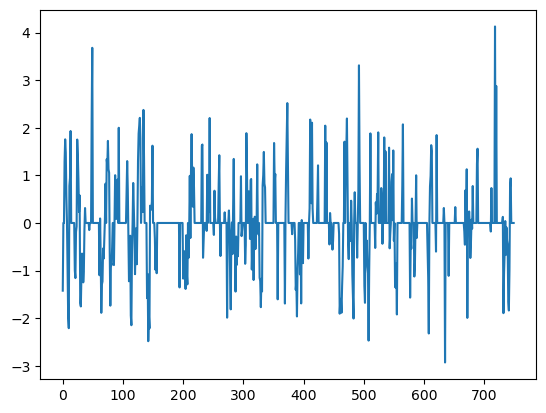

In [30]:
plt.plot(img_y[:,319])

In [75]:
asc_flist = open("hbn_asc_50.txt",'r').read().splitlines()
nt_flist = open("hbn_nt_50.txt",'r').read().splitlines()


In [169]:
asc_tpj=[]
nt_tpj=[]
n_asc=0
n_nt=0
print('----- extracting ASCs -----')
for f in asc_flist:
    try:
        im_file = glob.glob(f'../sourcedata/data/HBN/brain/clean/{f}/ses-*/{f}_ses-*_task-movieDM_space-fsLR_den-91k_bold_clean_mmp.ptseries.nii')
        #print(im_file[0])
        img = nb.load(im_file[0])
        img_y = img.get_fdata()
        #img_y = scaler.fit_transform(img_y)
        asc_tpj.append(img_y[:,319])
        print(f'appended {f}')
        n_asc=n_asc+1
    except:
        print(f'file for {f} dne')
        
print('----- extracting NTs -----')
for f in nt_flist:
    try:
        im_file = glob.glob(f'../sourcedata/data/HBN/brain/clean/{f}/ses-*/{f}_ses-*_task-movieDM_space-fsLR_den-91k_bold_clean_mmp.ptseries.nii')
        #print(im_file[0])
        img = nb.load(im_file[0])
        img_y = img.get_fdata()
        #img_y = scaler.fit_transform(img_y)
        nt_tpj.append(img_y[:,319])
        print(f'appended {f}')
        n_nt=n_nt+1

    except:
        print(f'file for {f} dne')

----- extracting ASCs -----
file for sub-NDARAA947ZG5 dne
appended sub-NDARAD232HVV
appended sub-NDARAE358VBE
appended sub-NDARAE877NER
file for sub-NDARAH503YG1 dne
appended sub-NDARAM357BUA
file for sub-NDARAM848GTE dne
appended sub-NDARAN262WK6
appended sub-NDARAP785CTE
appended sub-NDARAT680GJA
file for sub-NDARAV519RND dne
appended sub-NDARAX272ZJL
appended sub-NDARAX277ATU
file for sub-NDARBA680RFY dne
file for sub-NDARBD992CH7 dne
file for sub-NDARBF851NH6 dne
appended sub-NDARBL042LWN
appended sub-NDARBL214YLX
file for sub-NDARBN365EV3 dne
appended sub-NDARBR128UFP
appended sub-NDARCA146GG1
appended sub-NDARCC340ER5
appended sub-NDARCD357CZR
appended sub-NDARCD687JUZ
appended sub-NDARCM811CV1
appended sub-NDARCN500KJG
appended sub-NDARCV154DB9
file for sub-NDARCV944JA6 dne
appended sub-NDARCV981XUY
file for sub-NDARDB161LU6 dne
appended sub-NDARDC987BMU
appended sub-NDARDE681UEX
appended sub-NDARDE877RFH
appended sub-NDARDF374LGN
appended sub-NDARDH214UVC
appended sub-NDARDJ970

In [77]:
from scipy.interpolate import interp1d

def downsample(array, npts):
    interpolated = interp1d(np.arange(len(array)), array, axis = 0, fill_value = 'extrapolate')
    downsampled = interpolated(np.linspace(0, len(array), npts))
    return downsampled

#downsampled_y = downsample(y, 6000)

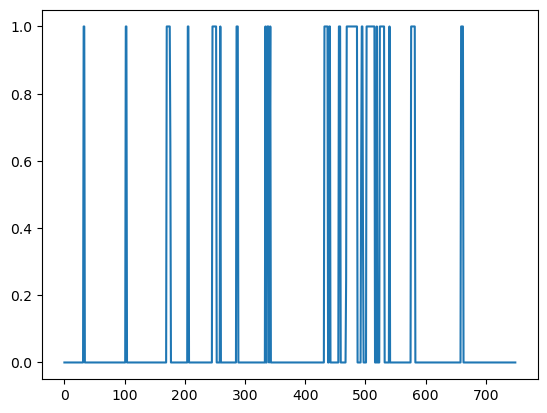

In [78]:
mental=pd.read_csv('../sourcedata/data/HBN/features/tom/dm/combined/mental_stringent.tsv', sep='\t' )
downsampled_mental = downsample(mental['value'].values, 750)

plt.plot(downsampled_mental)

In [84]:
np.mean(asc_tpj,axis=0).shape

(750,)

In [171]:
from scipy.stats import sem
def plot_all(list_in,title,feature):
    list_in = [n for n in list_in if len(n)==750]
#     list_in = [n for n in list_in if len(n)==250]

    degree_list = np.array(list_in)
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)

    plt.figure(figsize=(20, 3),facecolor='white')


    for d in degree_list:
#        if len(d) == 250:
        if len(d) == 750:
            plt.plot(d,linewidth=0.5)

    x=np.arange(degree_list_mean.shape[0])
    y=degree_list_mean
    error=degree_list_sem/2
    #plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,feature*4, label='mental feature',c='r',linewidth=2)
    plt.plot(x,y,label='mean timecourse',c='k',linewidth=2)
    plt.fill_between(x, y-error, y+error, label = 'sem timecourse',edgecolor='k', facecolor='gray')
    plt.ylabel('parcel mean signal')
    plt.xlabel('TR')
    plt.legend()
    plt.title(f'{title}')

In [172]:
def plot_vs(list_in_1,list_in_2,title,feature):
    list_in_1 = [n for n in list_in_1 if len(n)==750]
    list_in_2 = [n for n in list_in_2 if len(n)==750]

#     list_in = [n for n in list_in if len(n)==250]

    degree_list = np.array(list_in_1)
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)
    
    vs_list = np.array(list_in_2)
    vs_list_sem = sem(vs_list)
    vs_list_mean = np.mean(vs_list, axis=0)

    plt.figure(figsize=(20, 3),facecolor='white')


#     for d in degree_list:
# #        if len(d) == 250:
#         if len(d) == 750:
#             plt.plot(d,linewidth=0.5)

    x=np.arange(degree_list_mean.shape[0])
    error=degree_list_sem/2
    #plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,feature*2, label='mental feature',c='black',linewidth=2)
    plt.plot(x,degree_list_mean,label='ASC mean timecourse',c='r',linewidth=2)
    plt.plot(x,vs_list_mean,label='NT mean timecourse 2',c='b',linewidth=2)

    #plt.fill_between(x, y-error, y+error, label = 'sem timecourse',edgecolor='k', facecolor='gray')
    plt.ylabel('parcel mean signal')
    plt.xlabel('TR')
    plt.legend()
    plt.title(f'{title}')


In [173]:
def plot_vs_zoomed(list_in_1,list_in_2,title,feature,start,stop):
    list_in_1 = [n for n in list_in_1 if len(n)==750]
    list_in_2 = [n for n in list_in_2 if len(n)==750]
#     list_in = [n for n in list_in if len(n)==250]

    degree_list = np.array(list_in_1)[:,start:stop]
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)

    vs_list = np.array(list_in_2)[:,start:stop]
    vs_list_sem = sem(vs_list)
    vs_list_mean = np.mean(vs_list, axis=0)

    plt.figure(figsize=(20, 3),facecolor='white')


#     for d in degree_list:
# #        if len(d) == 250:
#         if len(d) == 750:
#             plt.plot(d,linewidth=0.5)
    feature=feature[start:stop]
    x=np.arange(start,stop)
    error=degree_list_sem/2
    error2=vs_list_sem/2

    #plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,feature*2, label='mental feature',c='black',linewidth=2)

    plt.fill_between(x, degree_list_mean-error, degree_list_mean+error, label = 'ASC sem',edgecolor='red', facecolor='red', alpha=0.3)
    plt.plot(x,degree_list_mean,label='ASC mean timecourse',c='r',linewidth=2)
    plt.fill_between(x, vs_list_mean-error2, vs_list_mean+error2, label = 'NT sem',edgecolor='blue', facecolor='blue', alpha=0.3)
    plt.plot(x,vs_list_mean,label='NT mean timecourse 2',c='b',linewidth=2)


    plt.ylabel('parcel mean signal')
    plt.xlabel('TR')
    plt.legend()
    plt.title(f'{title}')


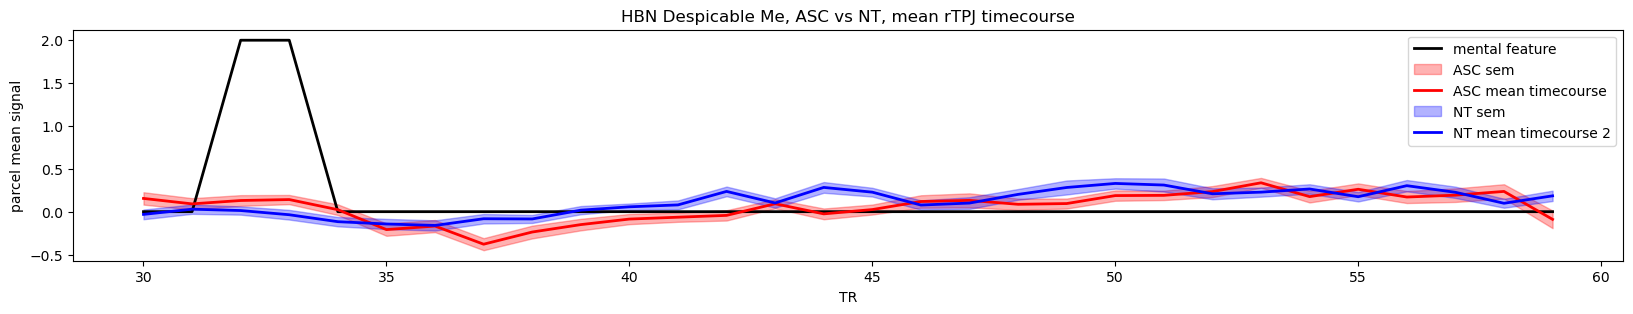

In [175]:
plot_vs_zoomed(asc_tpj, nt_tpj, 'HBN Despicable Me, ASC vs NT, mean rTPJ timecourse', downsampled_mental,30,60)

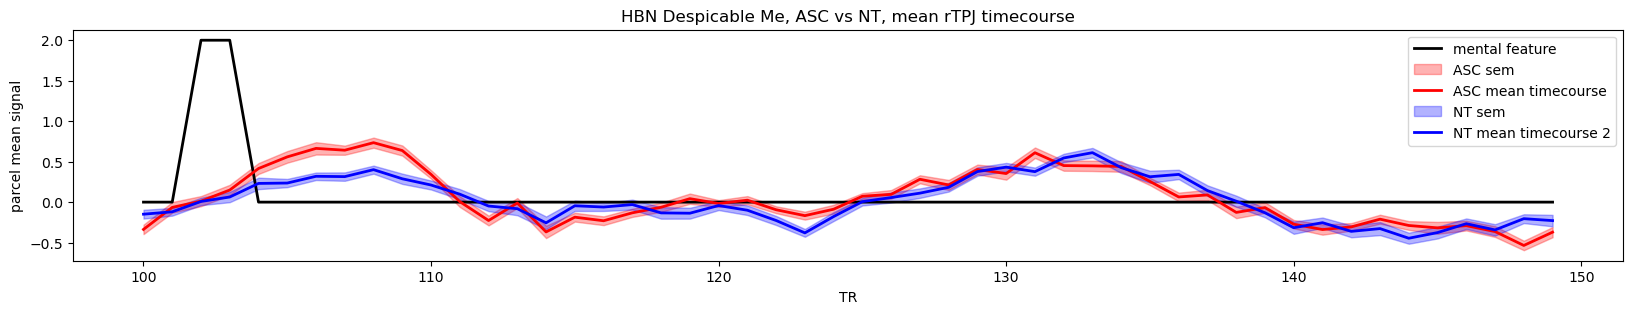

In [176]:
plot_vs_zoomed(asc_tpj, nt_tpj, 'HBN Despicable Me, ASC vs NT, mean rTPJ timecourse', downsampled_mental,100,150)

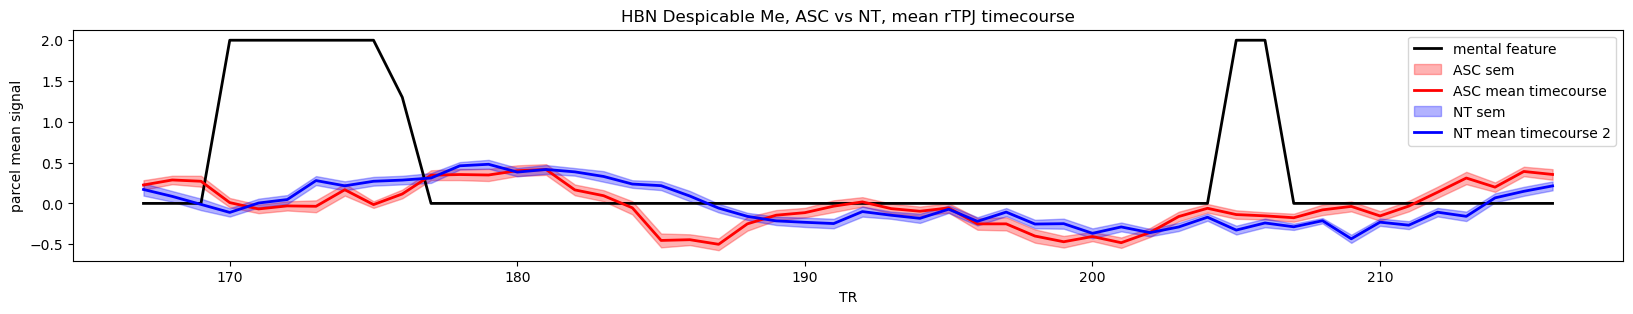

In [177]:
plot_vs_zoomed(asc_tpj, nt_tpj, 'HBN Despicable Me, ASC vs NT, mean rTPJ timecourse', downsampled_mental,167,217)

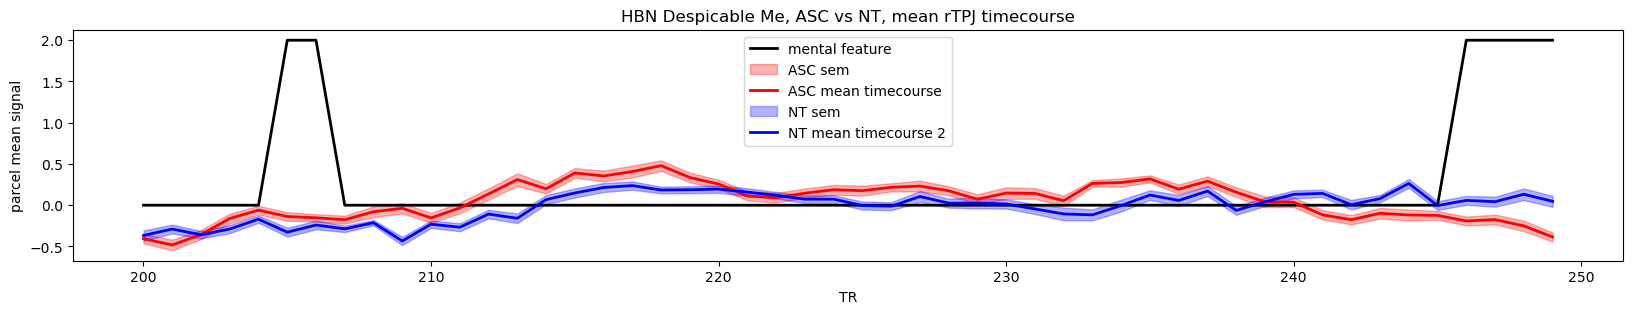

In [178]:
plot_vs_zoomed(asc_tpj, nt_tpj, 'HBN Despicable Me, ASC vs NT, mean rTPJ timecourse', downsampled_mental,200,250)

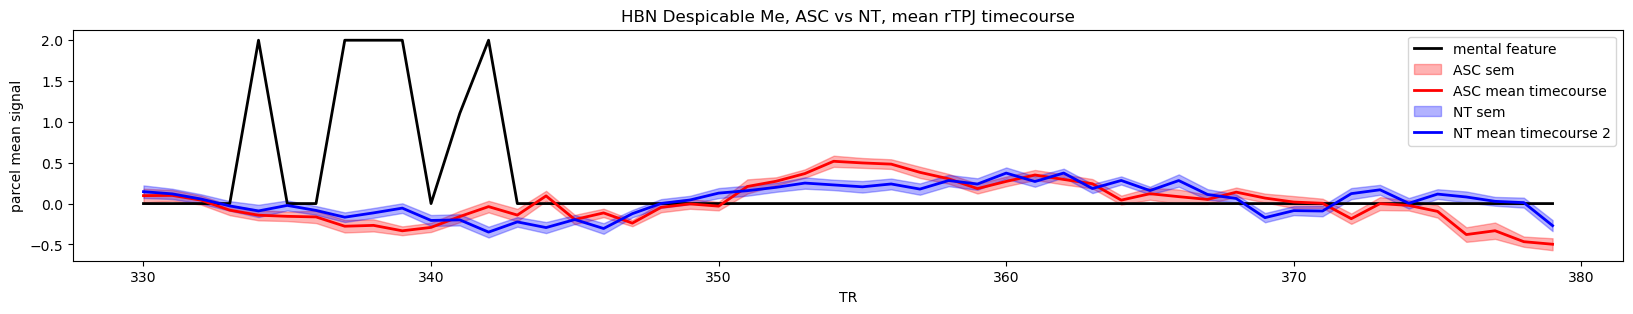

In [179]:
plot_vs_zoomed(asc_tpj, nt_tpj, 'HBN Despicable Me, ASC vs NT, mean rTPJ timecourse', downsampled_mental,330,380)

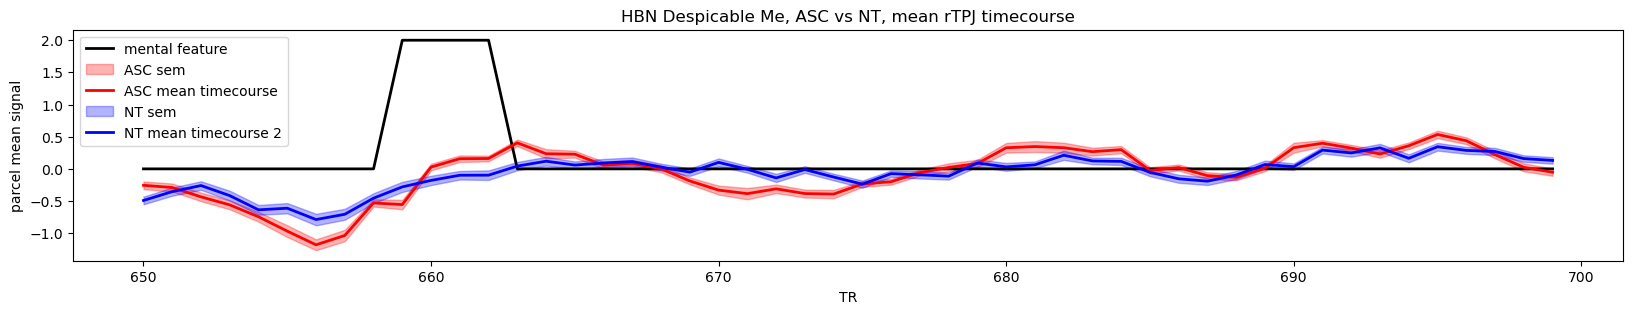

In [180]:
plot_vs_zoomed(asc_tpj, nt_tpj, 'HBN Despicable Me, ASC vs NT, mean rTPJ timecourse', downsampled_mental,650,700)

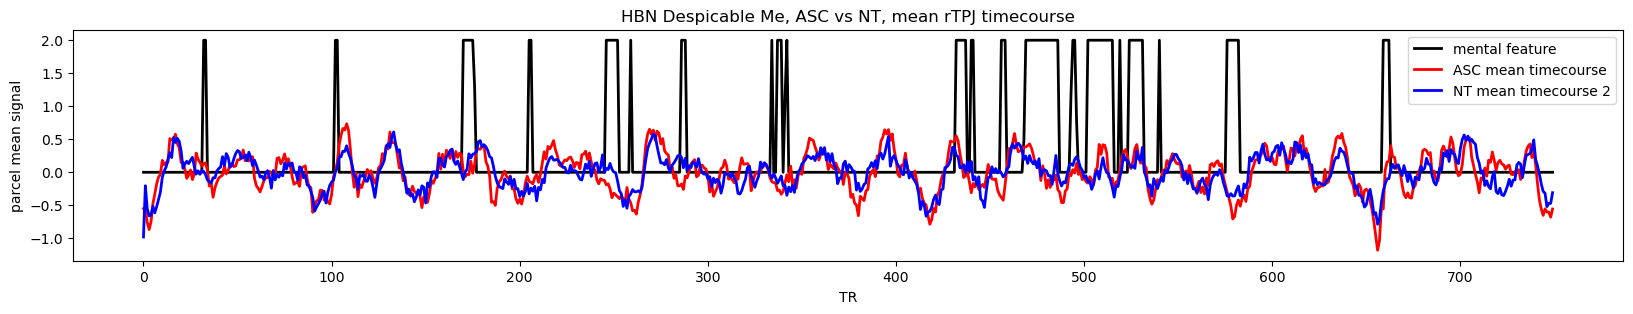

In [181]:
plot_vs(asc_tpj, nt_tpj, 'HBN Despicable Me, ASC vs NT, mean rTPJ timecourse', downsampled_mental)

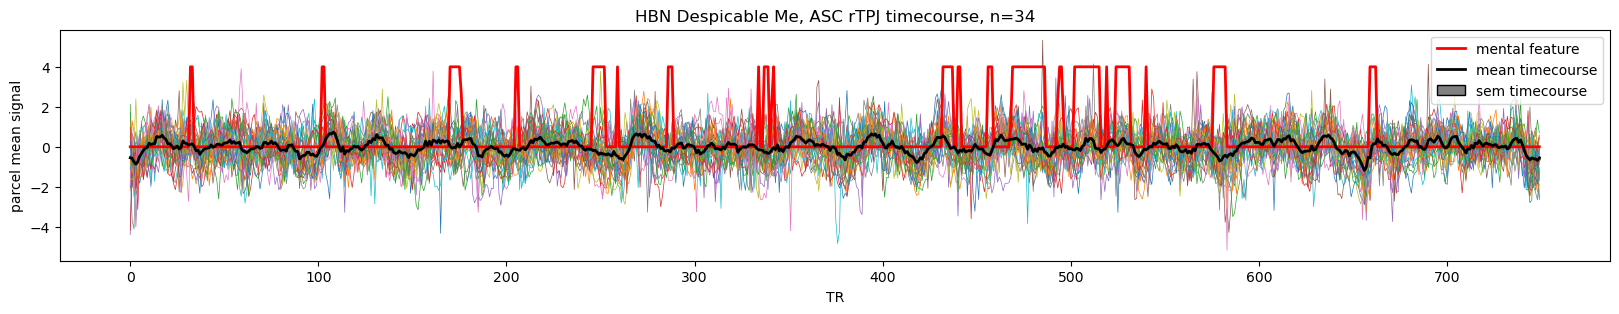

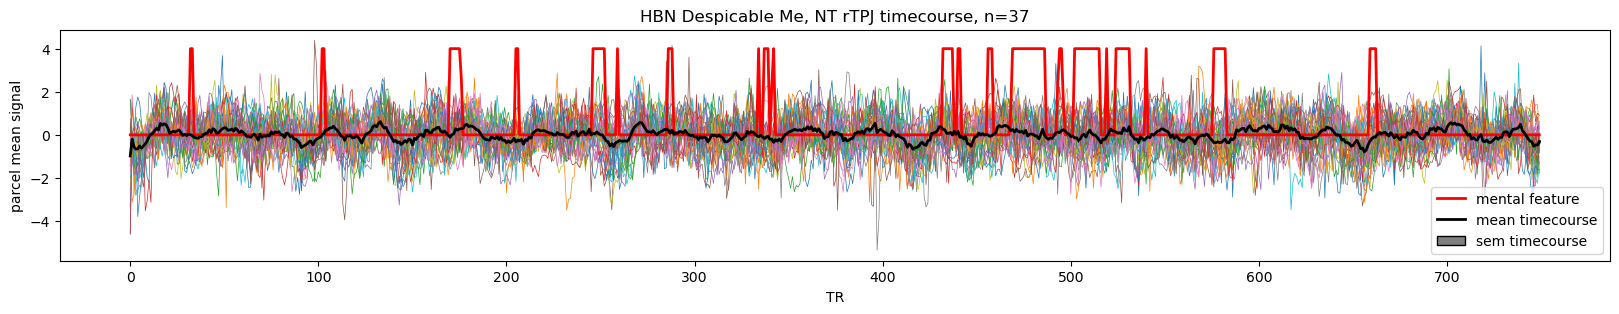

In [182]:
asc_label=f'HBN Despicable Me, ASC rTPJ timecourse, n={n_asc}'
plot_all(asc_tpj,asc_label,downsampled_mental)

nt_label=f'HBN Despicable Me, NT rTPJ timecourse, n={n_nt}'
plot_all(nt_tpj,nt_label,downsampled_mental)